In [27]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.nn import convolution, conv2d_transpose

In [28]:
N = 100
dt = 0.01
h = 1

In [29]:
A = -np.array([[0, -1, 0, 0], [-1, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 0]])
B = -np.array([[0, 0, -1, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0]]) * h
C = -np.array([[0, 0, 0, 0], [0, 0, 0, 0], [1, 0, -1, 0], [0, 0, 0, 0]]) * h
D = np.array([[0, 0, 0, 0], [0, 0, 1, 0], [0, -1, 0, 1], [0, 0, -1, 0]]) / h**2

In [56]:
D

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0., -1.,  0.,  1.],
       [ 0.,  0., -1.,  0.]])

In [31]:
_filt_0 = np.stack([B, C, D]).reshape(3,4,4,1).transpose((1, 2, 3, 0))
_filt_1 = A.reshape(1,4,4,1).transpose((1, 2, 3, 0))

jdx0=np.arange(1, 2 * N + 1, 2)
jdx1=np.arange(2, 2 * N + 1, 2)
jdx2=np.arange(0, 2 * N + 2, 2)
jdx3=np.arange(1, 2 * N + 2, 2)

In [32]:
_filt_0.shape

(4, 4, 1, 3)

In [33]:
np.squeeze(_filt_1)

array([[ 0,  1,  0,  0],
       [ 1,  0, -1,  0],
       [ 0, -1,  0,  0],
       [ 0,  0,  0,  0]])

In [34]:
_X = np.zeros(shape=(2 * N + 2, 2 * N + 2))
dX = _X * 0

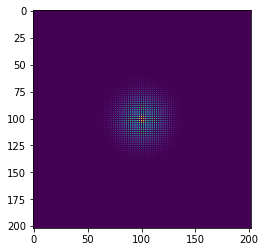

In [35]:
x = np.linspace(0,10,2 * N + 2)
mesh = np.stack(np.meshgrid(x, x))

_X[jdx1.reshape(-1,1),jdx1.reshape(1,-1)] = np.exp(-np.sum(np.square(mesh-np.array([5,5]).reshape((2,1,1))), axis=0))[jdx1.reshape(-1,1),jdx1.reshape(1,-1)]

plt.imshow((_X))

In [36]:
_R = _X.copy()*0 + 1
_R[jdx3.reshape(-1,1), jdx2.reshape(1,-1)] = 1
_R[jdx2.reshape(-1,1), jdx3.reshape(1,-1)] = 1

In [37]:
mu = 1
eps = 1

In [38]:
filt_0= tf.constant(_filt_0, name='maxwell', dtype=tf.float64)
filt_1= tf.constant(_filt_1, name='continuity', dtype=tf.float64)
R= tf.constant(_R.reshape((1, 2 * N + 2, 2 * N + 2, 1)), name='resistance', dtype=tf.float64)
X = tf.Variable(_X.reshape((1, 2 * N + 2, 2 * N + 2, 1)), name='X', dtype=tf.float64)

In [39]:
for jter in range(1):
    y_0 = tf.squeeze(convolution(X, filters=filt_0, strides=2, padding='VALID'))
    y_1 = tf.squeeze(convolution(X / R, filters=filt_1, strides=2, padding='VALID'))
    
    _x = np.squeeze((X / R / eps).numpy())
    dX[jdx0.reshape(-1,1), jdx0.reshape(1,-1)] = y_1.numpy()
    dX[jdx0.reshape(-1,1), jdx1.reshape(1,-1)] = y_0.numpy()[:, :, 0] - _x[jdx0.reshape(-1,1), jdx1.reshape(1,-1)]  
    dX[jdx1.reshape(-1,1), jdx0.reshape(1,-1)] = y_0.numpy()[:, :, 1] - _x[jdx1.reshape(-1,1), jdx0.reshape(1,-1)] 
    dX[jdx1.reshape(-1,1), jdx1.reshape(1,-1)] = y_0.numpy()[:, :, 2]

    X.assign_add(dt * dX.reshape((1, 2 * N + 2, 2 * N + 2, 1)) / mu / eps)
    # print(np.max(np.squeeze(X)[jdx1.reshape(-1,1),jdx1.reshape(1,-1)]))
print((np.sum(np.square(np.squeeze(X)[jdx1.reshape(-1,1),jdx1.reshape(1,-1)])) - \
           np.sum(np.square(np.squeeze(X)[jdx0.reshape(-1,1), jdx1.reshape(1,-1)])) - \
           np.sum(np.square(np.squeeze(X)[jdx1.reshape(-1,1), jdx0.reshape(1,-1)]))) * h ** 2)

158.65404261415733


In [40]:
np.squeeze(X)[jdx0.reshape(-1,1), jdx1.reshape(1,-1)][50,50]

4.907676925593352e-05

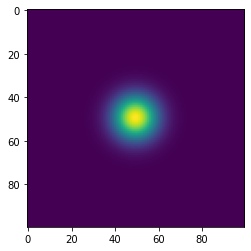

In [15]:
plt.imshow(np.squeeze(X)[jdx1.reshape(-1,1),jdx1.reshape(1,-1)])

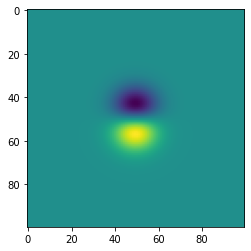

In [16]:
plt.imshow(np.squeeze(X)[jdx0.reshape(-1,1), jdx1.reshape(1,-1)])

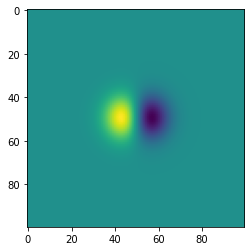

In [17]:
plt.imshow(np.squeeze(X)[jdx1.reshape(-1,1), jdx0.reshape(1,-1)])

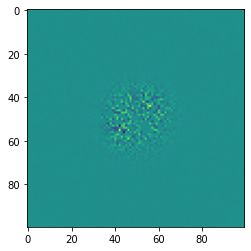

In [22]:
plt.imshow(np.squeeze(dX)[jdx0.reshape(-1,1),jdx0.reshape(1,-1)])

In [ ]:
np.max(np.abs(np.squeeze(X)[jdx0.reshape(-1,1),jdx0.reshape(1,-1)]
             ))

In [ ]:
x = np.linspace(0,10,1000)
x_pos, y_pos = np.meshgrid(x, x)

In [ ]:
np.squeeze(X)[jdx1.reshape(-1,1), jdx0.reshape(1,-1)].shape

In [ ]:
#fig, ax = plt.subplots()

plt.figure(figsize=(60, 60))
x_pos = 0
y_pos = 0
x_direct = 1
y_direct = 1
plt.axis('equal');
plt.quiver(np.linspace(0,10,50),np.linspace(0,10,50),np.squeeze(X)[jdx0[::20].reshape(-1,1), jdx1[::20].reshape(1,-1)],np.squeeze(X)[jdx1[::20].reshape(-1,1), jdx0[::20].reshape(1,-1)])

plt.show()

In [ ]:
dX

In [ ]:
tf.Session().run?

In [ ]:
tf.Session().run

In [ ]:
Z=tf.squeeze(X)

In [ ]:
tf.Tensor?

In [ ]:
Z[1::2,1::2]=y_0

In [ ]:
tf.tile?

In [ ]:
_R = _R*0

In [ ]:
_R[jdx1.reshape(-1,1), jdx1.reshape(1,-1)]=1

In [ ]:
_R

In [ ]:
y.shape

In [ ]:
x = tf.zeros(shape=(1,12,12,1), dtype=tf.float32)

In [ ]:
ff = tf.reshape(tf.constant([[0,-1],[1,0]], dtype=tf.float32), (2,2,1,1))

In [ ]:
ff

In [ ]:
y=convolution(x, ff, 'SAME')

In [ ]:
print(y)

In [ ]:
with  tf.Session() as sess:
    print(sess.run(y))

In [ ]:
y

In [ ]:
x = x_0
for jter in range(max_iter):
    